In [1]:
include("dsm.jl")

import dsm
import PyPlot
import DSP

In [2]:
f_s = 1e6;
T_s = 1/f_s;

n_fft = 2^19;        # number of fft points
n_ini = 2^5;         # number of initial points for settling
k = 41;

f_i = f_s/n_fft*k;   # input frequency
a_i = .7;            # input amplitude
b_i = 0;             # input offset
n_i = 0;             # input noise power

t = 0:T_s:T_s*(n_fft+n_ini-1);
inp = a_i*sin.(2*pi*f_i*t) + b_i + 2*n_i*(rand(size(t))-.5);

int_1 = zeros(size(t));
int_2 = zeros(size(t));
q_0   = zeros(size(t));
q_0[1] = -1;

for i = 2:length(inp)
    int_1[i] = int_1[i-1] + (inp[i] - q_0[i-1]);
    int_2[i] = int_2[i-1] + (int_1[i] - q_0[i-1]);
    q_0[i] = (int_2[i] > 0)*2-1;
end

q = q_0[end-n_fft+1:end];

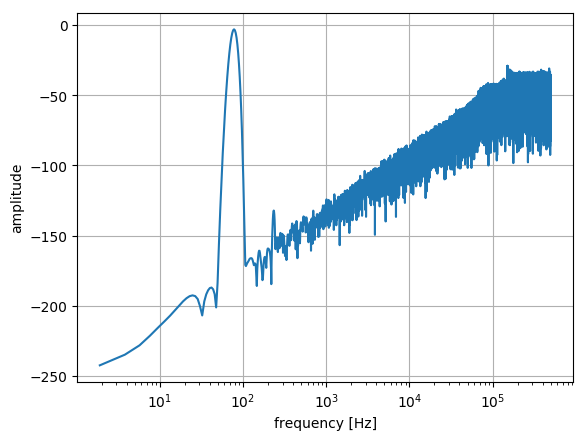

In [3]:
w = DSP.Windows.kaiser(n_fft, 20);
wf = mean(w);
Y_inp = fft(q.*w)/n_fft/wf;

f = linspace(0, f_s/2, (n_fft/2+1));

PyPlot.semilogx(f[2:end], 20*log10.(2*abs.(Y_inp[2:trunc(Int64, n_fft/2+1)])));
PyPlot.xlabel("frequency [Hz]");
PyPlot.ylabel("amplitude");
PyPlot.grid();

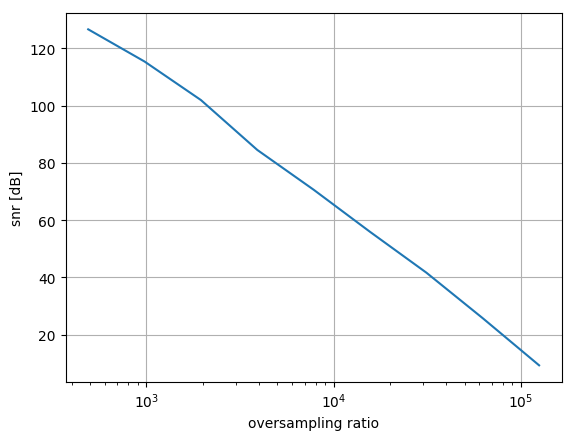

In [4]:
osr_sw = [2^i for i in 2:10];
f_bw_sw = f_s/2./osr_sw;
snr_sw = zeros(length(osr_sw));

for (i, f_bw) in enumerate(f_bw_sw)
    snr_sw[i] = dsm.snr(q, f_i, f_bw, f_s);
end

PyPlot.semilogx(f_bw_sw, snr_sw);
PyPlot.xlabel("oversampling ratio");
PyPlot.ylabel("snr [dB]");
PyPlot.grid();